# Delays Seeking Medical Care and COVID-19 Diagnosis

## Objective

Although symptomatic, individuals in some parts of Mexico delay seeking medical care. It is really interesting to understand (add points here)



Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support
* numpy - data shuffling

**Use Magic %matplotlib to display graphics inline instead of in a popup window.**

In [2]:
import pandas as pd # pandas is a dataframe library
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import numpy as np

%matplotlib inline

## Table of Contents

1. Loading the Data
2. Preprocess the loaded data
3. Feature Identification and Engineering

# 1. Loading the Data

Open Data - Mexico General Directorate of Epidemiology - Daily Updates 
https://www.gob.mx/salud/documentos/datos-abiertos-152127


In [85]:
data = pd.read_csv("200808COVID19MEXICO.csv", encoding='latin-1')

In [86]:
data.shape

(1085897, 35)

### RENAME COLUMNS IN THE DATA FRAME

In [87]:
data.rename(columns = {'FECHA_ACTUALIZACION':'batch_date','ID_REGISTRO':'identifier','ORIGEN':'sentinel_surveillance','SECTOR':'health_system_type',
                       'ENTIDAD_UM':'medical_facility_location','SEXO':'gender','ENTIDAD_NAC':'birthplace','ENTIDAD_RES':'residence',
                       'MUNICIPIO_RES':'muncipality_res','TIPO_PACIENTE':'patient_type','FECHA_INGRESO':'admission_date','FECHA_SINTOMAS':'symptomatic_date',
                       'FECHA_DEF':'death_date','INTUBADO':'intubated','NEUMONIA':'pneumonia','EDAD':'age','NACIONALIDAD':'mexican','EMBARAZO':'pregnant',
                       'HABLA_LENGUA_INDIG':'speak_native_language','DIABETES':'diabetes','EPOC':'copd','ASMA':'asthma','INMUSUPR':'immuno','HIPERTENSION':'hypertension',
                       'OTRA_COM':'other_disease','CARDIOVASCULAR':'cardiovascular','OBESIDAD':'obesity','RENAL_CRONICA':'chronic_renal_failure','TABAQUISMO':'tobacco',
                       'OTRO_CASO':'other_covid_contact','RESULTADO':'covid_test_result','MIGRANTE':'migrant','PAIS_NACIONALIDAD':'nationality','PAIS_ORIGEN':'travel_from','UCI':'icu'}, inplace = True) 

Check for NULL values

In [6]:
#Records that need to be removed because they are null or empty
data.isnull().sum()

batch_date                   0
identifier                   0
sentinel_surveillance        0
health_system_type           0
medical_facility_location    0
gender                       0
birthplace                   0
residence                    0
muncipality_res              0
patient_type                 0
admission_date               0
symptomatic_date             0
death_date                   0
intubated                    0
pneumonia                    0
age                          0
mexican                      0
pregnant                     0
speak_native_language        0
diabetes                     0
copd                         0
asthma                       0
immuno                       0
hypertension                 0
other_disease                0
cardiovascular               0
obesity                      0
chronic_renal_failure        0
tobacco                      0
other_covid_contact          0
covid_test_result            0
migrant                      0
national

In [ ]:
#REMOVE ALL RECORDS THAT ARE NaN
data.dropna(inplace=True)

In [91]:
# display all columns
pd.set_option('display.max_columns', None)

# display first few records
data.head(15)

,batch_date,identifier,sentinel_surveillance,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,admission_date,symptomatic_date,death_date,intubated,pneumonia,age,mexican,pregnant,speak_native_language,diabetes,copd,asthma,immuno,hypertension,other_disease,cardiovascular,obesity,chronic_renal_failure,tobacco,other_covid_contact,covid_test_result,migrant,nationality,travel_from,icu,days_treatment_delay
0,2020-08-08,18fec6,2,4,9,2,9,9,11,2,2020-04-14,2020-04-06,2020-04-20,2,2,43,1,97,2,2,2,2,2,2,2,2,2,2,1,99,1,99,MÃ©xico,99,2,8 days
1,2020-08-08,1781dd,2,3,2,1,2,2,2,1,2020-05-28,2020-05-26,9999-99-99,97,2,45,1,2,2,2,2,2,2,2,2,2,1,2,2,1,1,99,MÃ©xico,99,97,2 days
2,2020-08-08,114ccc,2,3,15,1,15,15,51,1,2020-06-01,2020-05-29,9999-99-99,97,2,47,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,3 days
3,2020-08-08,0b1dd6,2,4,9,2,31,9,15,1,2020-04-16,2020-04-14,9999-99-99,97,2,50,1,97,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,97,2 days
4,2020-08-08,14f6b4,2,4,30,1,30,30,175,1,2020-04-28,2020-04-18,9999-99-99,97,2,37,1,2,2,1,2,2,2,1,2,2,1,2,2,99,1,99,MÃ©xico,99,97,10 days
5,2020-08-08,1db028,2,4,15,1,20,9,5,1,2020-04-30,2020-04-29,9999-99-99,97,2,55,1,2,2,2,2,2,2,2,2,2,1,2,2,99,1,99,MÃ©xico,99,97,1 days
6,2020-08-08,1912e2,2,3,27,1,27,27,4,1,2020-06-14,2020-06-06,2020-07-27,97,2,63,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,MÃ©xico,99,97,8 days
7,2020-08-08,020f91,2,4,9,2,9,9,5,1,2020-04-20,2020-04-15,2020-04-22,97,2,30,1,97,2,2,2,2,2,2,2,2,1,2,1,99,1,99,MÃ©xico,99,97,5 days
8,2020-08-08,032f4a,2,3,15,1,15,15,118,1,2020-06-25,2020-06-22,9999-99-99,97,2,43,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,3 days
9,2020-08-08,061130,2,4,15,1,15,15,25,1,2020-04-17,2020-04-14,9999-99-99,97,2,44,1,2,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,97,3 days


# 2. Preprocess the loaded data

In [8]:
# verify data types
data.dtypes

batch_date                   object
identifier                   object
sentinel_surveillance         int64
health_system_type            int64
medical_facility_location     int64
gender                        int64
birthplace                    int64
residence                     int64
muncipality_res               int64
patient_type                  int64
admission_date               object
symptomatic_date             object
death_date                   object
intubated                     int64
pneumonia                     int64
age                           int64
mexican                       int64
pregnant                      int64
speak_native_language         int64
diabetes                      int64
copd                          int64
asthma                        int64
immuno                        int64
hypertension                  int64
other_disease                 int64
cardiovascular                int64
obesity                       int64
chronic_renal_failure       

In [93]:
#Preprocess the date variables
# change death_date to datetime data type
data['admission_date']= pd.to_datetime(data['admission_date']) 
#create new column, days_treatment_delay by subtracting admission date from symptomatic date to determine days delayed seeking treatment
# change death_date to datetime data type
data['symptomatic_date']= pd.to_datetime(data['symptomatic_date']) 
data['days_treatment_delay'] = data['admission_date'].sub(data['symptomatic_date'], axis=0)
# change days_treatment_delay to proper integer with no decimal
data['days_treatment_delay'] = data['days_treatment_delay'] / np.timedelta64(1, 'D')
# change data types to int
data['days_treatment_delay'] = data['days_treatment_delay'].astype(int)



In [97]:
# change data types to int
data['age'] = data['age'].astype(int)
data['intubated'] = data['intubated'].astype(int)
data['other_covid_contact'] = data['other_covid_contact'].astype(int)
data['covid_test_result'] = data['covid_test_result'].astype(int)

In [100]:
#replace date placeholder "9999-99-99" value with nonsense real date value of 1-1-1900
data['death_date'] = data['death_date'].replace(['9999-99-99'],['1900-01-01']) 
# change death_date to datetime data type
data['death_date'] = pd.to_datetime(data['death_date'])

In [104]:
data.head(15)

,batch_date,identifier,sentinel_surveillance,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,admission_date,symptomatic_date,death_date,intubated,pneumonia,age,mexican,pregnant,speak_native_language,diabetes,copd,asthma,immuno,hypertension,other_disease,cardiovascular,obesity,chronic_renal_failure,tobacco,other_covid_contact,covid_test_result,migrant,nationality,travel_from,icu,days_treatment_delay,delayed,patient_died
0,2020-08-08,18fec6,2,4,9,2,9,9,11,2,2020-04-14,2020-04-06,2020-04-20,2,2,43,1,97,2,2,2,2,2,2,2,2,2,2,1,99,1,99,MÃ©xico,99,2,8,1,1
1,2020-08-08,1781dd,2,3,2,1,2,2,2,1,2020-05-28,2020-05-26,1900-01-01,97,2,45,1,2,2,2,2,2,2,2,2,2,1,2,2,1,1,99,MÃ©xico,99,97,2,0,0
2,2020-08-08,114ccc,2,3,15,1,15,15,51,1,2020-06-01,2020-05-29,1900-01-01,97,2,47,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,3,1,0
3,2020-08-08,0b1dd6,2,4,9,2,31,9,15,1,2020-04-16,2020-04-14,1900-01-01,97,2,50,1,97,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,97,2,0,0
4,2020-08-08,14f6b4,2,4,30,1,30,30,175,1,2020-04-28,2020-04-18,1900-01-01,97,2,37,1,2,2,1,2,2,2,1,2,2,1,2,2,99,1,99,MÃ©xico,99,97,10,1,0
5,2020-08-08,1db028,2,4,15,1,20,9,5,1,2020-04-30,2020-04-29,1900-01-01,97,2,55,1,2,2,2,2,2,2,2,2,2,1,2,2,99,1,99,MÃ©xico,99,97,1,0,0
6,2020-08-08,1912e2,2,3,27,1,27,27,4,1,2020-06-14,2020-06-06,2020-07-27,97,2,63,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,MÃ©xico,99,97,8,1,1
7,2020-08-08,020f91,2,4,9,2,9,9,5,1,2020-04-20,2020-04-15,2020-04-22,97,2,30,1,97,2,2,2,2,2,2,2,2,1,2,1,99,1,99,MÃ©xico,99,97,5,1,1
8,2020-08-08,032f4a,2,3,15,1,15,15,118,1,2020-06-25,2020-06-22,1900-01-01,97,2,43,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,3,1,0
9,2020-08-08,061130,2,4,15,1,15,15,25,1,2020-04-17,2020-04-14,1900-01-01,97,2,44,1,2,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,97,3,1,0


# **Feature Identification and Engineering**

The following features will be used to indicate a patient who is high risk 
for COVID-19. 

## Feature explaination


1. age - feature that denotes patient's age.

2. delayed - feature that denotes that patient delayed seeking medical care after becoming symptomatic by at least 2 days.

3. risk_score - aggregate score denoting number of comorbidities for patient

4. residence - feature that denotes the state the patient resides in.

5. other_covid_contact - feature that denotes patient came into contact with another known positive COVID patient.

6. covid_test_result - feature that denotes COVID-19 diagnosis 



See number of rows and columns.

In [21]:
data.shape

(1085897, 38)

In [22]:
data.tail(10)

,batch_date,identifier,sentinel_surveillance,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,admission_date,symptomatic_date,death_date,intubated,pneumonia,age,mexican,pregnant,speak_native_language,diabetes,copd,asthma,immuno,hypertension,other_disease,cardiovascular,obesity,chronic_renal_failure,tobacco,other_covid_contact,covid_test_result,migrant,nationality,travel_from,icu,days_treatment_delay,delayed,patient_died
1085887,2020-08-08,14ea6f,2,12,28,2,28,28,32,1,2020-07-27,2020-07-15,1900-01-01,97,2,46,1,97,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,12,1,0
1085888,2020-08-08,0c0377,2,12,28,2,28,28,33,1,2020-08-01,2020-07-27,1900-01-01,97,2,42,1,97,2,2,2,2,2,2,2,1,2,2,2,1,3,99,MÃ©xico,99,97,5,1,0
1085889,2020-08-08,008f08,2,6,28,2,30,28,41,1,2020-08-01,2020-07-25,1900-01-01,97,2,28,1,97,2,2,2,2,2,2,2,2,2,2,2,1,3,99,MÃ©xico,99,97,7,1,0
1085890,2020-08-08,0f2534,1,4,17,1,17,17,28,1,2020-08-02,2020-07-31,1900-01-01,97,2,52,1,2,2,2,2,2,2,2,2,2,2,2,2,99,3,99,MÃ©xico,99,97,2,0,0
1085891,2020-08-08,03831b,2,8,28,2,28,28,32,1,2020-08-01,2020-07-29,1900-01-01,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,1,3,99,MÃ©xico,99,97,3,1,0
1085892,2020-08-08,16f9f8,1,12,28,2,28,28,38,1,2020-07-28,2020-07-28,1900-01-01,97,2,24,1,97,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,0,0,0
1085893,2020-08-08,156a86,2,12,9,2,9,9,11,2,2020-08-01,2020-08-01,2020-08-02,2,1,38,1,97,2,98,98,98,98,98,98,98,98,98,98,1,3,99,MÃ©xico,99,2,0,0,1
1085894,2020-08-08,02a9f9,2,4,19,1,19,19,39,1,2020-07-31,2020-07-26,2020-08-02,97,2,61,1,2,2,2,2,2,2,2,2,2,1,2,2,99,3,99,MÃ©xico,99,97,5,1,1
1085895,2020-08-08,110e67,2,12,9,1,9,9,7,1,2020-08-03,2020-08-03,1900-01-01,97,2,41,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,0,0,0
1085896,2020-08-08,02668d,2,12,15,2,15,15,109,1,2020-07-20,2020-07-15,1900-01-01,97,2,25,1,97,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,5,1,0


In [ ]:
# set delayed column to 1 if treatment delayed days greater than 2, otherwise set to 0
def delayed(c):
  if c['days_treatment_delay'] > 2:
    return '1'
  else:
    return '0'
data['delayed'] = data.apply(delayed, axis=1)
data['delayed'] = data['delayed'].astype(int)

In [ ]:
# create new column, patient_died with 1 for yes, 0 for no
def patient_died(c):
  d1='1900-01-01'
  if c['death_date'] == d1:
    return '0'
  else:
    return '1'
data['patient_died'] = data.apply(patient_died, axis=1)
# change data types to int
data['patient_died'] = data['patient_died'].astype(int)

In [ ]:
def remove_the_feature_from_dataframe(data,feature,value):
    indexNames = data[data[feature] == value].index 
    print(len(indexNames))
    data.drop(indexNames , inplace=True)
    
    
    

In [ ]:
remove_the_feature_from_dataframe(data,'covid_test_result',3)
data['covid_test_result'] = data['covid_test_result'].replace([2],[0])

In [107]:
#Get remove indexes for which columns of interest has unknown values
for feature in ['other_covid_contact','pneumonia','copd','diabetes','cardiovascular','chronic_renal_failure','obesity','hypertension'\
               ,'immuno','tobacco','icu']
    for value in [97,98,99]:
        remove_the_feature_from_dataframe(data,feature,value)
        data[feature] = data[feature].replace([2],[0])

Int64Index([      0,       3,       4,       5,       7,       9,      12,
                 16,      17,      18,
            ...
            1017798, 1017799, 1017802, 1017814, 1017819, 1017821, 1017824,
            1017826, 1017828, 1017832],
           dtype='int64', length=294869)

In [ ]:
data['intubated'] = data['intubated'].replace([2],[0])
data['patient_type'] = data['patient_type'].replace([2],[0])
data['gender'] = data['gender'].replace([2],[0])

In [119]:
data.tail(10)

,batch_date,identifier,sentinel_surveillance,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,admission_date,symptomatic_date,death_date,intubated,pneumonia,age,mexican,pregnant,speak_native_language,diabetes,copd,asthma,immuno,hypertension,other_disease,cardiovascular,obesity,chronic_renal_failure,tobacco,other_covid_contact,covid_test_result,migrant,nationality,travel_from,icu,days_treatment_delay,delayed,patient_died
1017833,2020-08-08,1e8245,2,12,14,2,14,14,8,1,2020-07-13,2020-07-12,1900-01-01,97,1,32,1,97,2,2,2,2,2,1,2,2,2,2,2,1,2,99,MÃ©xico,99,97,1,0,0
1017834,2020-08-08,05d0f6,2,12,11,1,11,11,18,1,2020-07-14,2020-07-12,1900-01-01,97,2,26,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,MÃ©xico,99,97,2,0,0
1017835,2020-08-08,072747,2,12,21,1,21,21,15,1,2020-07-28,2020-07-22,1900-01-01,97,2,25,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,MÃ©xico,99,97,6,1,0
1017836,2020-08-08,1b05ad,2,12,12,2,12,12,29,1,2020-07-28,2020-07-21,1900-01-01,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,1,2,2,99,MÃ©xico,99,97,7,1,0
1017837,2020-08-08,184512,1,12,9,2,9,9,3,1,2020-07-28,2020-07-24,1900-01-01,97,2,45,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,99,MÃ©xico,99,97,4,1,0
1017838,2020-08-08,1db4f4,2,9,21,2,15,21,114,1,2020-07-29,2020-07-26,1900-01-01,97,2,49,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,99,MÃ©xico,99,97,3,1,0
1017839,2020-08-08,183d07,2,12,9,1,9,9,12,1,2020-08-04,2020-07-20,1900-01-01,97,2,20,1,2,2,2,2,1,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,15,1,0
1017840,2020-08-08,1e33e8,2,12,11,1,11,11,7,1,2020-08-04,2020-08-02,1900-01-01,97,2,24,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,2,0,0
1017841,2020-08-08,1e2264,2,12,12,1,12,12,1,1,2020-08-04,2020-07-28,1900-01-01,97,2,68,1,2,2,2,2,2,2,1,2,2,2,2,2,1,2,99,MÃ©xico,99,97,7,1,0
1017842,2020-08-08,034c63,2,12,12,1,15,12,1,1,2020-08-04,2020-07-30,1900-01-01,97,2,31,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,MÃ©xico,99,97,5,1,0


In [47]:
data.head(110)

,batch_date,identifier,sentinel_surveillance,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,admission_date,symptomatic_date,death_date,intubated,pneumonia,age,mexican,pregnant,speak_native_language,diabetes,copd,asthma,immuno,hypertension,other_disease,cardiovascular,obesity,chronic_renal_failure,tobacco,other_covid_contact,covid_test_result,migrant,nationality,travel_from,icu,days_treatment_delay,delayed,patient_died
1,2020-08-08,1781dd,2,3,2,1,2,2,2,1,2020-05-28,2020-05-26,1900-01-01,97,2,45,1,2,2,2,2,2,2,2,2,2,1,2,2,1,1,99,MÃ©xico,99,97,2,0,0
2,2020-08-08,114ccc,2,3,15,1,15,15,51,1,2020-06-01,2020-05-29,1900-01-01,97,2,47,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,3,1,0
6,2020-08-08,1912e2,2,3,27,1,27,27,4,1,2020-06-14,2020-06-06,2020-07-27,97,2,63,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,MÃ©xico,99,97,8,1,1
8,2020-08-08,032f4a,2,3,15,1,15,15,118,1,2020-06-25,2020-06-22,1900-01-01,97,2,43,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,3,1,0
10,2020-08-08,080ee2,2,3,27,2,27,27,10,1,2020-06-27,2020-06-19,1900-01-01,97,2,30,1,97,2,2,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,97,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-08-08,00fcb5,2,3,27,2,27,27,4,1,2020-06-08,2020-06-04,1900-01-01,97,1,44,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,4,1,0
331,2020-08-08,13187e,2,3,15,2,15,15,85,2,2020-06-11,2020-06-05,1900-01-01,2,2,57,1,97,1,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,2,6,1,0
338,2020-08-08,12453e,2,3,27,1,27,27,4,1,2020-05-01,2020-04-19,1900-01-01,97,2,26,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,12,1,0
342,2020-08-08,08e016,2,3,15,2,15,15,72,2,2020-05-18,2020-05-15,1900-01-01,2,1,72,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,2,3,1,0


In [140]:
pd.crosstab(data.gender, data.covid_test_result)

covid_test_result,0,1
gender,,
0,185384,160607
1,207238,145543


### CREATE RISK SCORE BASED ON COMORBIDITIES (OTHER DISEASES, TREATMENT DELAY, AND OTHER COVID CONTACT)

In [151]:
sum_column = data["diabetes"] + data["obesity"] + data["cardiovascular"] + data["chronic_renal_failure"] + data["hypertension"] + data["immuno"] + data["tobacco"] + data["copd"] + data["delayed"] + data["other_covid_contact"]
data["risk_score"] = sum_column

In [148]:
pd.crosstab(data.gender, data.covid_test_result)

covid_test_result,0,1
gender,,
0,185384,160607
1,207238,145543


**CHANGE DATA TYPES TO INTEGER**

In [153]:
data['patient_died'] = data['patient_died'].astype(int)


In [154]:
data['delayed'] = data['delayed'].astype(int)

In [155]:
#verify data types are integers.
data.dtypes

batch_date                           object
identifier                           object
sentinel_surveillance                 int64
health_system_type                    int64
medical_facility_location             int64
gender                                int64
birthplace                            int64
residence                             int64
muncipality_res                       int64
patient_type                          int64
admission_date               datetime64[ns]
symptomatic_date             datetime64[ns]
death_date                   datetime64[ns]
intubated                             int64
pneumonia                             int64
age                                   int64
mexican                               int64
pregnant                              int64
speak_native_language                 int64
diabetes                              int64
copd                                  int64
asthma                                int64
immuno                          

**DROP UNUSED COLUMNS**

In [156]:
# remove the columns that will not be used for the model
data.drop(data.columns.difference(['age','delayed','patient_died','risk_score','health_system_type',	'medical_facility_location',	'gender',	'birthplace',	'residence',	'muncipality_res',	'patient_type','covid_test_result']), 1, inplace=True)

In [157]:
# display first few records
data.head(15)

,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,age,covid_test_result,delayed,patient_died,risk_score
1,3,2,1,2,2,2,1,45,1,0,0,2
2,3,15,1,15,15,51,1,47,1,1,0,2
6,3,27,1,27,27,4,1,63,1,1,1,2
8,3,15,1,15,15,118,1,43,1,1,0,2
10,3,27,0,27,27,10,1,30,1,1,0,3
11,3,27,1,27,27,6,1,44,1,1,0,2
13,3,27,1,27,27,4,1,43,1,1,0,1
14,3,27,0,27,27,4,1,65,1,0,0,0
15,3,27,0,27,27,4,1,42,1,1,0,2
19,3,27,0,27,27,4,1,28,1,1,0,2


In [158]:
data.tail(15)

,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,age,covid_test_result,delayed,patient_died,risk_score
1017825,12,19,0,19,19,39,1,26,0,0,0,1
1017827,12,18,1,18,18,17,1,41,0,1,0,2
1017829,12,11,0,11,11,7,1,59,0,1,0,3
1017830,9,24,1,24,24,13,1,24,0,1,0,2
1017831,12,27,0,27,27,6,1,49,0,0,0,2
1017833,12,14,0,14,14,8,1,32,0,0,0,2
1017834,12,11,1,11,11,18,1,26,0,0,0,0
1017835,12,21,1,21,21,15,1,25,0,1,0,1
1017836,12,12,0,12,12,29,1,27,0,1,0,2
1017837,12,9,0,9,9,3,1,45,0,1,0,1


Create a sample dataset from the cleaned data to be used for testing model.

In [159]:
data.to_csv(index=False),
compression_opts = dict(method=None,
                        archive_name='covid_sample.csv')  
data.to_csv('covid_sample.csv', index=False,
          compression=compression_opts)  

**CHECK CORRELATION**

In [160]:
def plot_corr(df, size=15):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe. 
    Shows the relationship between features.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  
                                                0 ------------------>  1
                                                Expect a line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

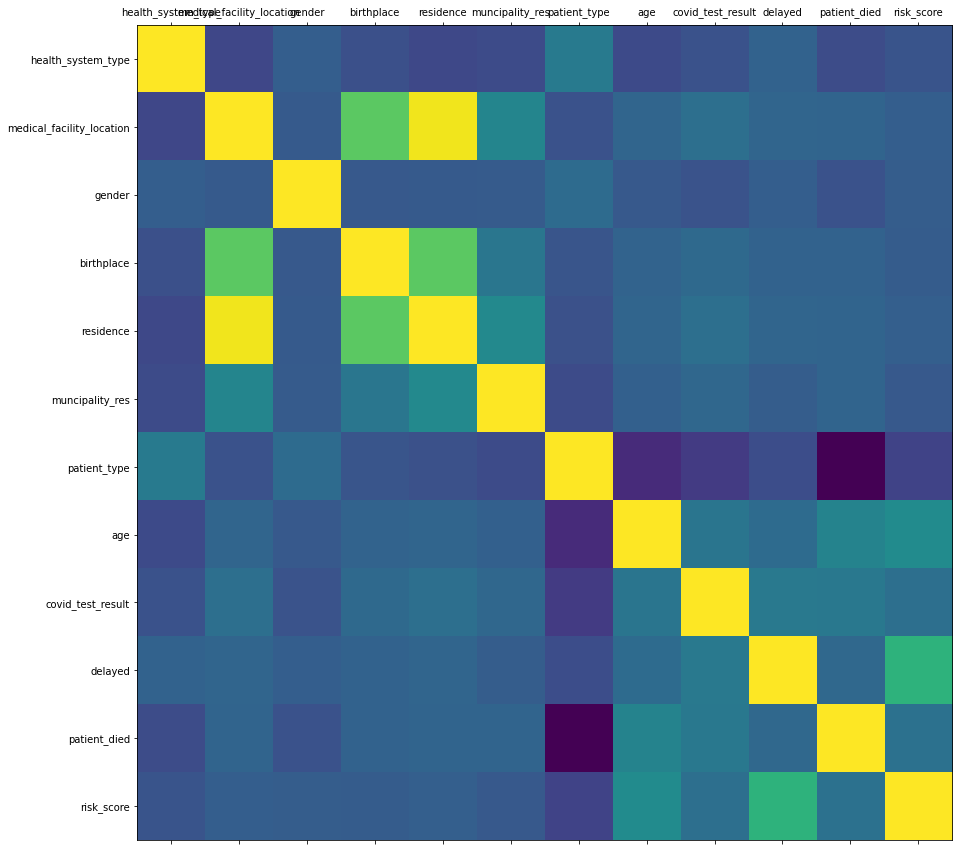

In [161]:
plot_corr(data)

Doesn't look like any features are related 1 to 1; so the correlations look good. There appear to be no coorelated columns.

For example, if yellow appears more than once in a row, consider those two features to be correlated (i.e. related) and one feature could be removed.

In [162]:
data.corr()

,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,age,covid_test_result,delayed,patient_died,risk_score
health_system_type,1.000000,-0.116654,0.006562,-0.070837,-0.110711,-0.093853,0.166907,-0.098198,-0.061609,0.025979,-0.086927,-0.046795
medical_facility_location,-0.116654,1.000000,-0.015532,0.643481,0.972166,0.228987,-0.060912,0.044006,0.097834,0.043758,0.036687,0.006547
gender,0.006562,-0.015532,1.000000,-0.019373,-0.017288,-0.009094,0.076855,-0.022167,-0.052033,0.007965,-0.059666,0.000573
birthplace,-0.070837,0.643481,-0.019373,1.000000,0.645218,0.140570,-0.045831,0.033698,0.065424,0.027635,0.026194,-0.005413
residence,-0.110711,0.972166,-0.017288,0.645218,1.000000,0.248431,-0.064587,0.044200,0.099928,0.043148,0.037044,0.009051
muncipality_res,-0.093853,0.228987,-0.009094,0.140570,0.248431,1.000000,-0.090887,0.017745,0.057282,0.001210,0.037519,-0.024127
patient_type,0.166907,-0.060912,0.076855,-0.045831,-0.064587,-0.090887,1.000000,-0.245686,-0.171194,-0.080168,-0.417430,-0.129637
age,-0.098198,0.044006,-0.022167,0.033698,0.044200,0.017745,-0.245686,1.000000,0.133444,0.075757,0.218163,0.267152
covid_test_result,-0.061609,0.097834,-0.052033,0.065424,0.099928,0.057282,-0.171194,0.133444,1.000000,0.153621,0.149146,0.102316
delayed,0.025979,0.043758,0.007965,0.027635,0.043148,0.001210,-0.080168,0.075757,0.153621,1.000000,0.062483,0.497116


# Check class distribution
Rare events are hard to predict.

Check covid test result as a predictor variable.

In [163]:
num_obs = len(data)
num_true = len(data.loc[data['covid_test_result'] == 1])
num_false = len(data.loc[data['covid_test_result'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  306150 (43.81%)
Number of False cases: 392622 (56.19%)


Check death as a predictor variable.

In [164]:
num_obs = len(data)
num_true = len(data.loc[data['patient_died'] == 1])
num_false = len(data.loc[data['patient_died'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  23976 (3.43%)
Number of False cases: 674796 (96.57%)


Check delayed as a predictor variable.

In [165]:
num_obs = len(data)
num_true = len(data.loc[data['delayed'] == 1])
num_false = len(data.loc[data['delayed'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  417730 (59.78%)
Number of False cases: 281042 (40.22%)


Adequate distribution of true and false cases. 

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy

# Splitting the data
80% for training, 20% for testing

In [166]:
data

,health_system_type,medical_facility_location,gender,birthplace,residence,muncipality_res,patient_type,age,covid_test_result,delayed,patient_died,risk_score
1,3,2,1,2,2,2,1,45,1,0,0,2
2,3,15,1,15,15,51,1,47,1,1,0,2
6,3,27,1,27,27,4,1,63,1,1,1,2
8,3,15,1,15,15,118,1,43,1,1,0,2
10,3,27,0,27,27,10,1,30,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1017838,9,21,0,15,21,114,1,49,0,1,0,1
1017839,12,9,1,9,9,12,1,20,0,1,0,2
1017840,12,11,1,11,11,7,1,24,0,0,0,1
1017841,12,12,1,12,12,1,1,68,0,1,0,3


In [167]:
def Randomizing():
    df = data.reindex(np.random.permutation(data.index))


Randomizing()

In [168]:

from sklearn.model_selection import train_test_split
feature_col_names = ['age','delayed','patient_died','risk_score','health_system_type',	'medical_facility_location',	'gender',	'birthplace',	'residence',	'muncipality_res',	'patient_type']
predicted_class_names = ['covid_test_result']

X = data[feature_col_names].values     # predictor feature columns (4 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size,random_state=42, shuffle=True) 


In [169]:
X_train

array([[43,  1,  0, ..., 28,  3,  1],
       [52,  0,  0, ..., 26, 30,  0],
       [43,  1,  0, ..., 12,  3,  1],
       ...,
       [29,  1,  0, ...,  9, 13,  1],
       [25,  1,  0, ..., 16, 66,  1],
       [41,  0,  0, ...,  5, 35,  1]], dtype=int64)

In [170]:
y_train

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [171]:
X_test

array([[84,  1,  0, ..., 19, 38,  1],
       [57,  1,  0, ..., 27, 16,  1],
       [34,  1,  0, ...,  9,  6,  1],
       ...,
       [72,  1,  0, ..., 21,  4,  0],
       [23,  0,  0, ...,  5, 30,  1],
       [27,  1,  0, ..., 28, 40,  1]], dtype=int64)

In [172]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [173]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(559017, 11) (559017, 1)
(139755, 11) (139755, 1)


We check to ensure we have the the desired 70% train, 30% test split of the data

In [174]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

80.00% in training set
20.00% in test set


# Naive Bayes
Predict probability of a negative COVID outcome

In [175]:
X_train

array([[43,  1,  0, ..., 28,  3,  1],
       [52,  0,  0, ..., 26, 30,  0],
       [43,  1,  0, ..., 12,  3,  1],
       ...,
       [29,  1,  0, ...,  9, 13,  1],
       [25,  1,  0, ..., 16, 66,  1],
       [41,  0,  0, ...,  5, 35,  1]], dtype=int64)

In [176]:
import numpy as np 

X_train_u = np.nan_to_num(X_train)  

In [177]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object 
nb_model = GaussianNB()

# train it with the data
nb_model.fit(X_train_u, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
#Make predictions.
preds = nb_model.predict(y_test)
print(preds)

[1 1 1 ... 1 1 1]


# Performance on Test Data

In [179]:
X_test

array([[84,  1,  0, ..., 19, 38,  1],
       [57,  1,  0, ..., 27, 16,  1],
       [34,  1,  0, ...,  9,  6,  1],
       ...,
       [72,  1,  0, ..., 21,  4,  0],
       [23,  0,  0, ...,  5, 30,  1],
       [27,  1,  0, ..., 28, 40,  1]], dtype=int64)

In [181]:
X_test_u = np.nan_to_num(X_test) 

In [182]:
X_test_u

array([[84,  1,  0, ..., 19, 38,  1],
       [57,  1,  0, ..., 27, 16,  1],
       [34,  1,  0, ...,  9,  6,  1],
       ...,
       [72,  1,  0, ..., 21,  4,  0],
       [23,  0,  0, ...,  5, 30,  1],
       [27,  1,  0, ..., 28, 40,  1]], dtype=int64)

# Predict values using the testing data

In [183]:
nb_predict_test = nb_model.predict(X_test_u)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 ... 1 0 0]
Accuracy: 0.6127


# Random Forest
Random Forest using decision trees.

In [184]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest object
rf_model = RandomForestClassifier(max_depth=15,random_state=123, n_estimators=100) 

# Train model
rf_model.fit(X_train_u, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

# Predict values using the testing data

In [185]:
X_test_u = np.nan_to_num(X_test) 

# Predict Test Data
rf_predict_test = rf_model.predict(X_test_u)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.6556


In [186]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("TP,FP")
print("FN,TN")
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[63632 15066]
 [33068 27989]]
TP,FP
FN,TN

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.81      0.73     78698
           1       0.65      0.46      0.54     61057

    accuracy                           0.66    139755
   macro avg       0.65      0.63      0.63    139755
weighted avg       0.65      0.66      0.64    139755




**Precision** is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”


**Recall** is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”


The **F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support** is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [187]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

# Logistic Regression


In [188]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plot
# create logistic regression object
lr_model=LogisticRegression(C=0.7, random_state=123, solver='liblinear', max_iter=1000)

# train model
lr_model.fit(X_train_u, y_train.ravel())
predY = lr_model.predict_proba(X_test)

# Predict values using the testing data

In [189]:
lr_predict_test = lr_model.predict(X_test_u)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("TP,FP")
print("FN,TN")
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.6254
TP,FP
FN,TN
[[65066 13632]
 [38720 22337]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.83      0.71     78698
           1       0.62      0.37      0.46     61057

    accuracy                           0.63    139755
   macro avg       0.62      0.60      0.59    139755
weighted avg       0.62      0.63      0.60    139755



# **GRAPH THE MODEL EVALUATION RESULTS (ROC)**

 



The optimal point on the ROC curve is (FPR, TPR) = (0,1). No false positives and all true positives. So the closer we get there the better. 

In [190]:
fpr, tpr, thresh = metrics.roc_curve(y_test,predY[:,1])
auc = metrics.auc(fpr, tpr)
print("Area Under the Curve:", auc)

Area Under the Curve: 0.6459713885679519


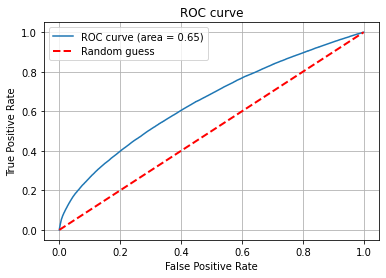

In [191]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

A diagonal line is a random guess that the model defines nonsense. If the curve approaches closer to the top-left corner, the model performance becomes much better. Any curve under the diagonal line is worse than a random guess.

# Using your trained Model

In [ ]:
# save trained model to file
from sklearn.externals import joblib  

# saving the Random Forest Model
joblib.dump(rf_model, "./covid-trained-model.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['./covid-trained-model.pkl']

In [ ]:
# load model

rf_covid_model = joblib.load("./covid-trained-model.pkl")

# Test Prediction on data

Once the model is loaded we can use it to predict on some data. In this case the data file contains a few rows from the CSV file we exported earlier.

In [ ]:
patients_sample_df = pd.read_csv("covid_sample.csv", encoding='latin-1')

In [ ]:
patients_sample_df

,death_date,intubated,age,tobacco,other_covid_contact,covid_test_result
0,2020-05-06,0,55,1,1,1
1,2020-06-24,1,46,0,0,1
2,2020-05-31,0,65,0,1,1
3,2020-06-22,1,62,0,0,1
4,2020-06-18,97,54,0,0,1
...,...,...,...,...,...,...
22148,2020-07-18,1,72,0,0,0
22149,2020-07-07,1,0,0,1,0
22150,2020-07-19,0,75,0,0,0
22151,2020-07-28,0,85,0,0,0


In [ ]:
patients_sample_df.shape

(22153, 6)

In [ ]:
# clean up column names - remove spaces, etc.
patients_sample_df.columns = patients_sample_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
# display first few records
patients_sample_df.head(10)

,gender,pneumonia,cardiovascular,obesity,covid_test_result
0,2,1,0,0,1
1,1,1,0,0,1
2,2,0,0,0,1
3,1,1,0,1,1
4,2,0,0,0,1
5,1,0,0,1,1
6,2,0,0,0,1
7,2,0,0,0,1
8,2,1,0,1,1
9,1,0,0,1,1


In [ ]:
# remove the column that will not be used
del patients_sample_df['covid_test_result']

In [ ]:
patients_sample_df

,gender,pneumonia,cardiovascular,obesity
0,2,1,0,0
1,1,1,0,0
2,2,0,0,0
3,1,1,0,1
4,2,0,0,0
...,...,...,...,...
828979,1,0,0,0
828980,2,0,0,0
828981,1,0,0,0
828982,1,0,0,0


In [ ]:
patients_sample_df.shape

(828984, 4)

In [ ]:
#Returns 1 if True, 0 if false
rf_covid_model.predict(patients_sample_df)

array([1, 1, 0, ..., 0, 0, 0])

Need to graphically show the ground truth (what you measured for your target variable for the training and testing examples) compared to predictor score.